In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('pdiabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


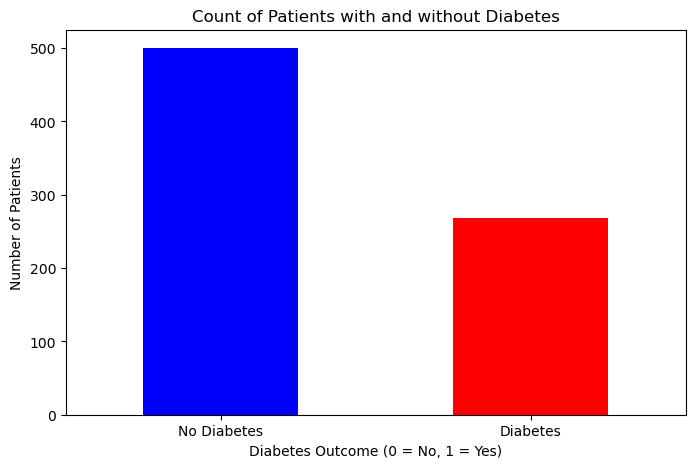

In [41]:
diabetes_counts = data['Outcome'].value_counts()
plt.figure(figsize=(8, 5))
diabetes_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Count of Patients with and without Diabetes')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

In [8]:
patients_above_40_with_diabetes = data[(data['Age'] > 40) & (data['Outcome'] == 1)]
print(patients_above_40_with_diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
754            8      154             78             32        0  32.4   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
8                  

In [9]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Accuracy without feature scaling:", accuracy_no_scaling)

Accuracy without feature scaling: 0.7467532467532467


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [13]:
model_with_scaling = LogisticRegression(max_iter=200)
model_with_scaling.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [14]:
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Accuracy with feature scaling:", accuracy_with_scaling)

Accuracy with feature scaling: 0.7532467532467533


In [15]:
print("Accuracy without feature scaling:", accuracy_no_scaling)
print("Accuracy with feature scaling:", accuracy_with_scaling)

Accuracy without feature scaling: 0.7467532467532467
Accuracy with feature scaling: 0.7532467532467533


In [16]:
sample_1 = X_test.iloc[0:1] 
sample_2 = X_test.iloc[1:2] 


In [17]:
pred_no_scaling_1 = model_no_scaling.predict(sample_1)[0]
pred_no_scaling_2 = model_no_scaling.predict(sample_2)[0]


In [18]:
sample_1_scaled = scaler.transform(sample_1)
sample_2_scaled = scaler.transform(sample_2)

In [19]:
pred_with_scaling_1 = model_with_scaling.predict(sample_1_scaled)[0]
pred_with_scaling_2 = model_with_scaling.predict(sample_2_scaled)[0]

In [20]:
print(f"Model without scaling sample 1: {pred_no_scaling_1}, sample 2: {pred_no_scaling_2}")
print(f"Model with scaling sample 1: {pred_with_scaling_1},  sample 2: {pred_with_scaling_2}")


Model without scaling sample 1: 0, sample 2: 0
Model with scaling sample 1: 0,  sample 2: 0
